# 词袋模型

词袋模型（Bag of Words，简称 BoW）是自然语言处理（NLP）中常用的文本表示方法，它将文本转化为数值特征（向量），进而可以用于机器学习等高阶处理。词袋模型将语料转化为二维矩阵，横向为所有在训练数据中出现的不重复的词汇（word），纵向为语料各句子或文档（document）。

简单来说，词袋模型用于计算词频。

## 课堂示例-英文twitter

### 导入数据

In [1]:
import pandas as pd
text_ana = pd.read_csv('text_analysis_twitter.csv')
text_ana = text_ana.drop(['Unnamed: 0'], axis=1)

In [2]:
text_ana

,id,screen_name,time,link,text,source
0,881004944714866688,KamalaHarris,2017-07-01T00:22:01-04:00,https://www.twitter.com/KamalaHarris/statuses/...,Republicans are trying to steal health care fr...,Sprout Social
1,881002538341986304,MarcVeasey,2017-07-01T00:12:28-04:00,https://www.twitter.com/kylegriffin1/statuses/...,RT @kylegriffin1 Rep. Mark Veasay has introduc...,Twitter for Android
2,881001393284419584,RepPaulTonko,2017-07-01T00:07:55-04:00,https://www.twitter.com/RepPaulTonko/statuses/...,A top U.S. science office went dark tonight. N...,Twitter for iPhone
3,881000301007958016,clairecmc,2017-07-01T00:03:34-04:00,https://www.twitter.com/clairecmc/statuses/881...,So the fundraising quarter ends in an hour in ...,Twitter for iPad
4,881015727540637696,tedcruz,2017-07-01T01:04:52-04:00,https://www.twitter.com/larry_kudlow/statuses/...,RT @larry_kudlow Important story @SenTedCruz @...,Twitter for iPhone
...,...,...,...,...,...,...
299995,939743413909549056,RepTedLieu,2017-12-10T01:27:44-05:00,https://www.twitter.com/ReadyLA/statuses/93956...,RT @ReadyLA REPORT FIRE DAMAGE from #CreekFire...,Twitter for iPhone
299996,939743003203301376,RepTedLieu,2017-12-10T01:26:06-05:00,https://www.twitter.com/LAFDtalk/statuses/9397...,RT @LAFDtalk Once a wildfire has burned throug...,Twitter for iPhone
299997,939741567706730497,JuliaBrownley26,2017-12-10T01:20:23-05:00,https://www.twitter.com/SCE/statuses/939739240...,"RT @SCE Update: As of 8:30pm, Saturday, about ...",Twitter Web Client
299998,939739240501596160,SteveKnight25,2017-12-10T01:11:09-05:00,https://www.twitter.com/santaclarita/statuses/...,RT @santaclarita #RyeFire Evening Update (12/9...,Twitter for iPhone


### 数据预处理

In [3]:
import re

def preprocess_text(text):    
    # 转换为小写
    text = text.lower()   
    # 移除URL
    text = re.sub(r'http\S+', '', text)    
    return text

### 构建词袋模型

In [4]:
from sklearn.feature_extraction.text import CountVectorizer

In [5]:
# 初始化CountVectorizer
vectorizer = CountVectorizer()

# 将文本数据转换为词袋特征矩阵
X = vectorizer.fit_transform(text_ana["text"].apply(preprocess_text))

# 展示特征矩阵的形状
print('词袋特征矩阵的形状:', X.shape)

# 展示词袋模型中的所有特征词
print('特征词列表:', vectorizer.get_feature_names_out())

词袋特征矩阵的形状: (300000, 121376)
特征词列表: ['00' '000' '0000' ... '투표하십시오' '한국어' 'ﬂees']


### 词频统计

In [6]:
# 获取词汇表
feature_words = vectorizer.get_feature_names_out()

# 计算词频统计
word_freq = dict(zip(feature_words, X.sum(axis=0).A1))

In [7]:
# 观察词袋模型的词频计数结果
sorted (word_freq.items(), key=lambda x: x[1], reverse=True)

[('the', 247160),
 ('to', 235370),
 ('of', 112428),
 ('in', 104912),
 ('and', 104025),
 ('for', 102100),
 ('rt', 83461),
 ('on', 72986),
 ('amp', 65500),
 ('is', 64785),
 ('we', 53564),
 ('our', 49736),
 ('this', 45532),
 ('you', 40235),
 ('with', 39027),
 ('it', 38749),
 ('that', 38161),
 ('qt', 35691),
 ('at', 33821),
 ('are', 31301),
 ('will', 29565),
 ('tax', 28529),
 ('my', 27644),
 ('be', 26920),
 ('from', 26202),
 ('today', 24574),
 ('have', 23005),
 ('by', 22865),
 ('more', 22665),
 ('trump', 19894),
 ('bill', 19534),
 ('their', 19129),
 ('about', 18973),
 ('as', 18391),
 ('all', 18295),
 ('not', 18197),
 ('your', 17615),
 ('who', 17098),
 ('can', 15465),
 ('health', 14215),
 ('has', 14119),
 ('an', 13861),
 ('they', 13858),
 ('us', 13825),
 ('here', 13799),
 ('house', 13680),
 ('people', 13486),
 ('great', 13468),
 ('now', 13113),
 ('families', 12838),
 ('must', 12787),
 ('up', 12602),
 ('was', 12513),
 ('need', 12313),
 ('americans', 12279),
 ('help', 12145),
 ('act', 12064),

### 构建词云图

In [8]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt 

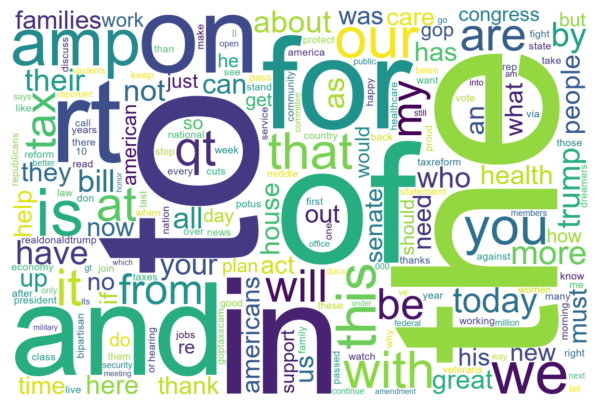

<Figure size 640x480 with 0 Axes>

In [9]:
# 根据词袋模型分析结果绘制词云图
wc = WordCloud(
    width=1200, 
    height=800, 
    background_color='white', 
    font_path='arial.ttf'
).generate_from_frequencies(word_freq)

# 显示词云图
plt.figure(figsize=(10, 5))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()
plt.savefig('wordcloud_twi.png', dpi=100)

## 课堂示例-中文微博

### 导入数据

In [10]:
import pandas as pd

In [12]:
text_ana = pd.read_csv('text_analysis_weibo.csv', index_col = 0)
text_ana

,标题/微博内容,点赞,转发,评论,账号昵称UID加密,粉丝数,关注数,地域
0,#高校通报教师图书馆打电话声音过大出言不逊#公道自在人心，谣言自在人心 ​​,0,0,0,a2331b38901d62d2d9a20529177ef3b3,0,22,湖北
1,转发C,0,0,0,d6dc4470f51fce93cc0cbad8abf55a75,0,33,广西
2,【#刘雨昕运动者联濛#河山覆冰雪，健儿迎冬奥[金牌]全能唱跳不设限，运动联濛开新年🇨🇳 期待...,0,0,0,372bc4782eb442b88035f920a7c1a68e,6,85,广东
3,丁程鑫//@丁程鑫后援会官博:#丁程鑫[超话]# ✨#丁程鑫 二十成金筑梦鑫世界# 大年初一...,0,0,0,6fe0d482bd3e78a3483e2a1d57f14ef2,75,1012,广东
4,诶，你们真不要脸诶。。。没资格宣传奥运。。。抵制抵制！,0,0,0,872380d71d6ee9130e8b49d331f2baa9,0,10,广东
...,...,...,...,...,...,...,...,...
49995,935天气路况早知道 2022年3月2日 星期三 今日限行尾号3和8 8：00分发布 ...,0,0,0,2231ab79796d569625633acafd9f1351,445,74,河南
49996,4月1日起，交通违法记分规则重大调整！ http://t.cn/A66zxfR0 ​​,0,0,0,91c9d380c1cc7811be5ee10ce510d77a,842,54,甘肃
49997,转发C,0,0,1,301771db13798e2dd493c02a44e59444,99,3433,江苏
49998,全体 甘肃车主注意 4月1日起，全面实施！ ...,0,0,0,NaN,0,0,甘肃


### 分析语料

In [13]:
text = list(text_ana['标题/微博内容'])
text

['#高校通报教师图书馆打电话声音过大出言不逊#公道自在人心，谣言自在人心 \u200b\u200b',
 '转发C',
 '【#刘雨昕运动者联濛#河山覆冰雪，健儿迎冬奥[金牌]全能唱跳不设限，运动联濛开新年🇨🇳 期待全能音乐人@刘雨昕 与#运动者联濛#一起，为冬奥赛事助力加油！】',
 '丁程鑫//@丁程鑫后援会官博:#丁程鑫[超话]# ✨#丁程鑫 二十成金筑梦鑫世界# 大年初一锁定@北京卫视 和门面主舞@时代少年团-丁程鑫 一起过大年，拥抱冰雪，致敬冬奥！',
 '诶，你们真不要脸诶。。。没资格宣传奥运。。。抵制抵制！',
 '转发C',
 '#熊猫守护者##全面二创冰墩墩#北京冬奥会如火如荼地进行中，滚滚我的好朋友冰墩墩也十分活跃，看滚滚我做一组舒展运动，为中国健儿加油鼓劲儿！[嘻嘻][嘻嘻] http://t.cn/A6ilerDZ 视频来源：@桃花源生态保护基金会 \u200b\u200b\u200b',
 '转发C',
 '2022北京冬奥会加油！冰墩墩雪容融也非常可爱！期待我国奥运健儿们的精彩表现[开学季]#云支教迎冬奥# \u200b\u200b',
 '和@TFBOYS-易烊千玺 一起助力东奥！一起向未来！',
 '转发C',
 '[心]',
 '守护[心]',
 '#易烊千玺邀你唱响一起向未来# //@M28号星球:#易烊千玺邀你唱响一起向未来# 26.17',
 '//@翔霖神谕:感谢@爱奇艺 的分享。新年胜旧年，春妍惹绚烂，万事胜意与平安喜乐的祝福徒增和乐，@时代少年团-严浩翔 @时代少年团-贺峻霖  同少年关注北京台春晚，拥锦瑟年华岁岁。',
 '好棒[打call][打call][打call]//@只是叭呐呐:哇晒哇晒！厉害我顶起！！！#蔡徐坤代言燕京啤酒# //@蔡徐坤的大喇叭萱:#蔡徐坤[超话]# I#蔡徐坤代言燕京啤酒# 恭喜燕京啤酒，在北京冬奥会官方赞助商冬奥营销传播声量总榜单正式发布位列第三！和代言人@蔡徐坤 一起释放活力，点燃激情，喝彩冬奥！[干杯]',
 '转发C',
 '//@杰克涛:金牌稳了[笑而不语]',
 '转发C',
 '//@许佳琪kiki:#一起冬奥吧# 中国队加油呀⛽️',
 '转发C',
 '蹲',
 '转发',
 '#周深一起向未来高音太绝了#@卡布叻_周深 录制《一起向未来》花絮来了！这漂亮的高音简直绝绝

### jieba分词

In [14]:
import jieba

In [15]:
def word_segmentation(text):
    words = jieba.lcut(text)
    return ''.join(words)

text_ana['标题/微博内容'] = text_ana['标题/微博内容'].iloc[:100]\
.astype(str).apply(word_segmentation)
text_ana['标题/微博内容'].head()

Building prefix dict from the default dictionary ...
Dumping model to file cache C:\Users\sunning\AppData\Local\Temp\jieba.cache
Loading model cost 1.972 seconds.
Prefix dict has been built successfully.


0               #高校通报教师图书馆打电话声音过大出言不逊#公道自在人心，谣言自在人心 ​​
1                                                  转发C
2    【#刘雨昕运动者联濛#河山覆冰雪，健儿迎冬奥[金牌]全能唱跳不设限，运动联濛开新年🇨🇳 期待...
3    丁程鑫//@丁程鑫后援会官博:#丁程鑫[超话]# ✨#丁程鑫 二十成金筑梦鑫世界# 大年初一...
4                          诶，你们真不要脸诶。。。没资格宣传奥运。。。抵制抵制！
Name: 标题/微博内容, dtype: object

In [16]:
text = list(text_ana['标题/微博内容'].dropna())
text

['#高校通报教师图书馆打电话声音过大出言不逊#公道自在人心，谣言自在人心 \u200b\u200b',
 '转发C',
 '【#刘雨昕运动者联濛#河山覆冰雪，健儿迎冬奥[金牌]全能唱跳不设限，运动联濛开新年🇨🇳 期待全能音乐人@刘雨昕 与#运动者联濛#一起，为冬奥赛事助力加油！】',
 '丁程鑫//@丁程鑫后援会官博:#丁程鑫[超话]# ✨#丁程鑫 二十成金筑梦鑫世界# 大年初一锁定@北京卫视 和门面主舞@时代少年团-丁程鑫 一起过大年，拥抱冰雪，致敬冬奥！',
 '诶，你们真不要脸诶。。。没资格宣传奥运。。。抵制抵制！',
 '转发C',
 '#熊猫守护者##全面二创冰墩墩#北京冬奥会如火如荼地进行中，滚滚我的好朋友冰墩墩也十分活跃，看滚滚我做一组舒展运动，为中国健儿加油鼓劲儿！[嘻嘻][嘻嘻] http://t.cn/A6ilerDZ 视频来源：@桃花源生态保护基金会 \u200b\u200b\u200b',
 '转发C',
 '2022北京冬奥会加油！冰墩墩雪容融也非常可爱！期待我国奥运健儿们的精彩表现[开学季]#云支教迎冬奥# \u200b\u200b',
 '和@TFBOYS-易烊千玺 一起助力东奥！一起向未来！',
 '转发C',
 '[心]',
 '守护[心]',
 '#易烊千玺邀你唱响一起向未来# //@M28号星球:#易烊千玺邀你唱响一起向未来# 26.17',
 '//@翔霖神谕:感谢@爱奇艺 的分享。新年胜旧年，春妍惹绚烂，万事胜意与平安喜乐的祝福徒增和乐，@时代少年团-严浩翔 @时代少年团-贺峻霖  同少年关注北京台春晚，拥锦瑟年华岁岁。',
 '好棒[打call][打call][打call]//@只是叭呐呐:哇晒哇晒！厉害我顶起！！！#蔡徐坤代言燕京啤酒# //@蔡徐坤的大喇叭萱:#蔡徐坤[超话]# I#蔡徐坤代言燕京啤酒# 恭喜燕京啤酒，在北京冬奥会官方赞助商冬奥营销传播声量总榜单正式发布位列第三！和代言人@蔡徐坤 一起释放活力，点燃激情，喝彩冬奥！[干杯]',
 '转发C',
 '//@杰克涛:金牌稳了[笑而不语]',
 '转发C',
 '//@许佳琪kiki:#一起冬奥吧# 中国队加油呀⛽️',
 '转发C',
 '蹲',
 '转发',
 '#周深一起向未来高音太绝了#@卡布叻_周深 录制《一起向未来》花絮来了！这漂亮的高音简直绝绝

### 构建词袋模型

In [19]:
from sklearn.feature_extraction.text import CountVectorizer

In [20]:
# 初始化CountVectorizer
vectorizer = CountVectorizer()

# 将文本数据转换为词袋特征矩阵
X = vectorizer.fit_transform(text)

# 展示特征矩阵的形状
print('词袋特征矩阵的形状:', X.shape)

词袋特征矩阵的形状: (100, 376)


In [21]:
# 展示词袋模型中的所有特征词
print('特征词列表:', vectorizer.get_feature_names_out())

特征词列表: ['1020' '167' '17' '19岁的张哥也要对自己温柔哦' '19岁的张真源会越来越好' '2022北京冬奥会加油' '26'
 '2月5日晚' '5月刊封面' 'a669n33f' 'a66hqzun' 'a66v9mln' 'a6i5bc1o' 'a6ierqv2'
 'a6igrcur' 'a6ikvewj' 'a6ikxrlc' 'a6ilerdz' 'a6ipxoe0' 'a6jy3xv2'
 'a6mn51qh' 'a6xwbtdu' 'an35' 'c2021年度十大mv' 'cn' 'heytea' 'http' 'into1'
 'into1尹浩宇实力vocal' 'into1雪舞花式祝福大赛' 'lm' 'm28号星球' 'tfboys' 'to19岁的张哥' 'wzy'
 '一休和尚小' '一定有结果' '一封他可能看不到的信' '一起' '一起为东奥写下美好祝福' '一起为冬奥健儿加油' '一起为冬奥加油'
 '一起为奥运健儿加油吧' '一起冬奥吧' '一起助力东奥' '一起向未来' '一起破冰向前' '一起过大年' '一起释放活力' '丁程鑫'
 '丁程鑫后援会官博' '万事胜意与平安喜乐的祝福徒增和乐' '三珩_' '不仅是声音' '不寻常的寒冬突然结束了' '与北京卫视' '严浩翔'
 '中国代表团已经实现了单届冬奥会金牌' '中国新年到' '中国牛逼' '中国的自信' '中国虎虎生威' '中国队加油呀' '中央美术学院'
 '中的小柴火' '为中国健儿加油' '为中国健儿加油鼓劲儿' '为冬奥赛事助力加油' '为冰雪运动喝彩' '为北京冬奥冰雪健儿们加油'
 '为我们展现了最美的奥林匹克精神' '举高高的帅' '也会提醒我们降温了要照顾身体' '也是我第一次关注的团内成员生日直播' '也照亮了我'
 '二十成金筑梦鑫世界' '云支教迎冬奥' '产生的奇妙火花' '什么是北京冬奥精神' '从这一天之后' '他不是一个单面' '会和我们说晚安'
 '会很照顾他们' '会给粉丝录清唱视频' '但总是关心着哥哥们' '你们真不要脸诶' '你便是那可以燎原的星星之火'
 '你十八岁的生日直播是我陪你一起过的第一个生日' '你又像个哥哥兼好朋友' '你好牛' '你妈我又来问候你了' '你对所有人都很温柔'
 '你本来就是

In [22]:
list(X.toarray())

[array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

### 词频统计

In [23]:
#获取词汇表
feature_words = vectorizer.get_feature_names_out()

#词频统计
word_freq = dict(zip(feature_words, X.sum(axis=0).A1))

In [24]:
#观察词袋模型的词频计数结果
sorted(word_freq.items(), key=lambda x:x[1], reverse=True)

[('转发c', 31),
 ('cn', 13),
 ('http', 11),
 ('时代少年团', 10),
 ('打call', 9),
 ('刘雨昕', 7),
 ('刘雨昕运动者联濛', 6),
 ('宋亚轩', 6),
 ('超话', 6),
 ('运动者联濛', 6),
 ('感谢', 5),
 ('一起向未来', 4),
 ('丁程鑫', 4),
 ('into1', 3),
 ('冰墩墩', 3),
 ('害羞', 3),
 ('明星日常', 3),
 ('林墨', 3),
 ('的分享', 3),
 ('一起', 2),
 ('与北京卫视', 2),
 ('为冬奥赛事助力加油', 2),
 ('产生的奇妙火花', 2),
 ('健儿迎冬奥', 2),
 ('全能唱跳不设限', 2),
 ('分享', 2),
 ('刘耀文', 2),
 ('加油', 2),
 ('单身狗', 2),
 ('卡布叻_周深http', 2),
 ('嘻嘻', 2),
 ('好想罗一舟', 2),
 ('宋亚轩官方后援会', 2),
 ('尹浩宇', 2),
 ('干杯', 2),
 ('开学季', 2),
 ('文轩星系', 2),
 ('易烊千玺邀你唱响一起向未来', 2),
 ('昕春初至万里山河', 2),
 ('期待全能唱跳歌手', 2),
 ('期待全能音乐人', 2),
 ('河山覆冰雪', 2),
 ('继续努力', 2),
 ('脚踏赛场', 2),
 ('蔡徐坤', 2),
 ('蔡徐坤代言燕京啤酒', 2),
 ('赢牛奶', 2),
 ('运动联濛开新年', 2),
 ('逐梦北京', 2),
 ('金牌', 2),
 ('雨你相约助阵冬奥', 2),
 ('1020', 1),
 ('167', 1),
 ('17', 1),
 ('19岁的张哥也要对自己温柔哦', 1),
 ('19岁的张真源会越来越好', 1),
 ('2022北京冬奥会加油', 1),
 ('26', 1),
 ('2月5日晚', 1),
 ('5月刊封面', 1),
 ('a669n33f', 1),
 ('a66hqzun', 1),
 ('a66v9mln', 1),
 ('a6i5bc1o', 1),
 ('a6ierqv2', 1),
 ('a6igrcur'

### 构建词云图

In [25]:
from wordcloud import WordCloud

In [26]:
import matplotlib.pyplot as plt

In [27]:
# 根据词袋模型分析结果绘制词云图
wc = WordCloud(width=1200,
               height=800,
               background_color='white',
               font_path='simhei.ttf').generate_from_frequencies(word_freq)

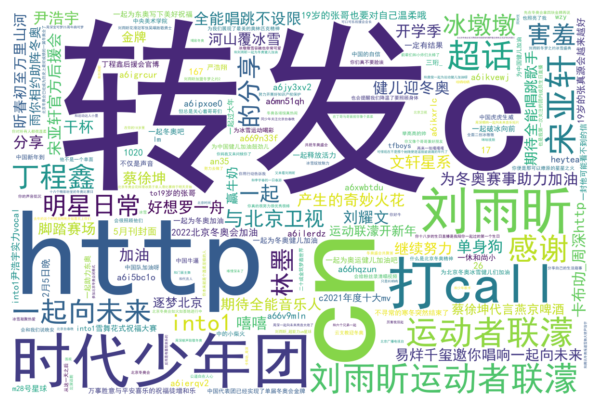

In [28]:
# 显示词云图
plt.figure(figsize=(10,5))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

## 以“chatgpt”为关键词的微博

### 导入数据

In [29]:
import pandas as pd
text_ana = pd.read_csv('chatgpt.csv', index_col = 0)
text_ana

,uid,content,retweets,comments,star,time
mid,,,,,,
4995637260851024,3171256063,"【🔥ChatGPT为Megan想了一个全套应对方案\n】\nChatGPT说：""如果我是Me...",142,80,1737,01月29日 21:50
5004272983084403,6444741184,从零开始学习大语言模型（一）\n做了一期大语言模型教程，不要299，也不要199，关注免费更...,109,14,221,02月22日 17:45
4997285800837908,3171256063,【ChatGPT辣评🌶】“认为文科没用的人，可能正是因为缺乏文科的教育，才看不到文科的价值所...,22,13,181,02月03日 11:00
4994965230848942,6182606334,另一个GPTs调用能力的牛批演示，在一个聊天中先使用Grimoire构建一个网页。\n然后直...,105,2,87,01月28日 01:19
4994859628232994,6182606334,昨晚ChatGPT推出了通过在正常的聊天中@ 其他GPTs协同处理任务的能力，这个能力非常强...,78,5,105,01月27日 18:19
...,...,...,...,...,...,...
4871691933845398,2375086267,【“双标”让\n#ChatGPT#\n光环褪色】托比亚斯·茨温曼是德国咨询公司RAPYD.A...,32,10,106,2023年02月21日 21:15
4871328748017037,1298124720,超逆马之前吹嘘美国铁路的名场面，他又声称美国铁路绝对值得中国铁路学习。\n学习什么呢？\n学...,35,43,241,2023年02月20日 21:12
4867670720386309,5999784751,#教师会被ChatGPT取代吗#\n\n#微博开学季#\n大声告诉我，人工智能最不能取代的职...,30,27,140,2023年02月10日 18:56


### 分析语料

In [30]:
text = list(text_ana['content'])
text

['【🔥ChatGPT为Megan想了一个全套应对方案\n】\nChatGPT说："如果我是Megan，面对Nicki的这波热辣攻势，我得来点既机智又有趣的回应，不能让这场较量变成单调的对峙。🌪️🎤\n1. 发行反击单曲：我会制作一首反击单曲，不仅歌词要机智有力，而且风格上要和Nicki截然不同，展现我的独特魅力。可能会给这首歌起个讽刺的名字，比如《Big Heart》或者《Not Just a Foot》。\n2. 推特对决：在Twitter上发起一场“战争”，用幽默和智慧回击Nicki的言论。比如回复说：“听了Nicki的《Big Foot》，我决定去做个足底按摩，感谢她提醒我照顾好自己！👣💆\u200d♀️ SelfCare”\n3. 制作搞笑视频：在TikTok或Instagram上发布一段搞笑视频，模仿Nicki的风格，但用夸张的手法来表现，向大家展示即使在争执中，我也能保持轻松和幽默的心态。\n4. 慈善活动：举办一场慈善活动，宣称每次Nicki提到我的名字，我就会为某个慈善机构捐款。这样一来，她每一次攻击都会转化为对社会的善举。\n5. 与粉丝互动：发起一个社交媒体挑战，让粉丝们来提供最有趣的回复Nicki的方式。这样不仅可以让粉丝参与进来，也可以从中收集一些灵感。\n当然，这一切都得在保持艺人形象和专业态度的基础上进行。毕竟，即使是在冲突中，也要保持风度和创意，让这场较量成为一场风趣的交流，而不是令人不快的争斗。😏🌟"\n#麻辣鸡开撕megan#\n\n#chatgpt#\n\n#GPT4为何会颠覆现有工作流#',
 '从零开始学习大语言模型（一）\n做了一期大语言模型教程，不要299，也不要199，关注免费更新。\n#免费AI课程#\n\n#chatgpt#\n#Sora#\n\nL\n林亦LYi的微博视频',
 '【ChatGPT辣评🌶】“认为文科没用的人，可能正是因为缺乏文科的教育，才看不到文科的价值所在！”\n当许多人因为就业率而歧视文科之时，ChatGPT等AI却在拼命学习文科和理科知识，一个都不放过！这还不能说明什么吗？\nChatGPT 刚刚辣评："哦，深刻的话题来了！如果我像某些理工科至上主义者那样，只接收理科知识，不接收文科的知识，那我可能会变成一个冷冰冰、逻辑至上、没有情感和同理心的机器。我会知道如何计算宇宙的年龄，但我不会理解人

### jieba分词

In [31]:
import jieba

In [32]:
def word_segmentation(text):
    words = jieba.lcut(text)
    return ' '.join(words)

text_ana['content'] = text_ana['content']
text_ana['content'].head()

mid
4995637260851024    【🔥ChatGPT为Megan想了一个全套应对方案\n】\nChatGPT说："如果我是Me...
5004272983084403    从零开始学习大语言模型（一）\n做了一期大语言模型教程，不要299，也不要199，关注免费更...
4997285800837908    【ChatGPT辣评🌶】“认为文科没用的人，可能正是因为缺乏文科的教育，才看不到文科的价值所...
4994965230848942    另一个GPTs调用能力的牛批演示，在一个聊天中先使用Grimoire构建一个网页。\n然后直...
4994859628232994    昨晚ChatGPT推出了通过在正常的聊天中@ 其他GPTs协同处理任务的能力，这个能力非常强...
Name: content, dtype: object

### 构建词袋模型

In [33]:
from sklearn.feature_extraction.text import CountVectorizer

# 初始化CountVectorizer
vectorizer = CountVectorizer()

# 将文本数据转换为词袋特征矩阵
X = vectorizer.fit_transform(text)

# 展示特征矩阵的形状
print('词袋特征矩阵的形状:', X.shape)

词袋特征矩阵的形状: (382, 8924)


In [34]:
# 展示词袋模型中的所有特征词
print('特征词列表:', vectorizer.get_feature_names_out())

特征词列表: ['00' '003美元一条' '005vnhzygy1hcj9734ktmj60sr0g60xg02' ... '黑客帝国' '黑胶架'
 '鼓机和嘻哈']


In [35]:
list(X.toarray())

[array([0, 0, 0, ..., 0, 0, 0], dtype=int64),
 array([0, 0, 0, ..., 0, 0, 0], dtype=int64),
 array([0, 0, 0, ..., 0, 0, 0], dtype=int64),
 array([0, 0, 0, ..., 0, 0, 0], dtype=int64),
 array([0, 0, 0, ..., 0, 0, 0], dtype=int64),
 array([0, 0, 0, ..., 0, 0, 0], dtype=int64),
 array([0, 0, 0, ..., 0, 0, 0], dtype=int64),
 array([0, 0, 0, ..., 0, 0, 0], dtype=int64),
 array([0, 0, 0, ..., 0, 0, 0], dtype=int64),
 array([0, 0, 0, ..., 0, 0, 0], dtype=int64),
 array([0, 0, 0, ..., 0, 0, 0], dtype=int64),
 array([0, 0, 0, ..., 0, 0, 0], dtype=int64),
 array([0, 0, 0, ..., 0, 0, 0], dtype=int64),
 array([0, 0, 0, ..., 0, 0, 0], dtype=int64),
 array([0, 0, 0, ..., 0, 0, 0], dtype=int64),
 array([0, 0, 0, ..., 0, 0, 0], dtype=int64),
 array([0, 0, 0, ..., 0, 0, 0], dtype=int64),
 array([0, 0, 0, ..., 0, 0, 0], dtype=int64),
 array([0, 0, 0, ..., 0, 0, 0], dtype=int64),
 array([0, 0, 0, ..., 0, 0, 0], dtype=int64),
 array([0, 0, 0, ..., 0, 0, 0], dtype=int64),
 array([0, 0, 0, ..., 0, 0, 0], dt

### 词频统计

In [36]:
# 获取词汇表
feature_words = vectorizer.get_feature_names_out()

# 计算词频统计
word_freq = dict(zip(feature_words, X.sum(axis=0).A1))

In [37]:
# 词袋模型中不重复的词汇的数量
len(word_freq)

8924

In [38]:
# 观察词袋模型的词频计数结果
sorted(word_freq.items(), key=lambda x: x[1], reverse=True)

[('chatgpt', 471),
 ('人工智能', 54),
 ('ai', 49),
 ('网页链接', 38),
 ('gpt', 35),
 ('openai', 33),
 ('超能新星汇', 18),
 ('the', 17),
 ('关键词', 15),
 ('10', 14),
 ('taylor', 14),
 ('ai白日梦想家超话', 13),
 ('midjourney', 13),
 ('张捷观察', 13),
 ('微博正文', 13),
 ('谁是谁非任评说的微博视频', 13),
 ('当然', 12),
 ('欺骗人类', 12),
 ('玉兔捣药', 12),
 ('and', 11),
 ('blender', 11),
 ('com', 11),
 ('github', 11),
 ('prompt', 10),
 ('sam', 10),
 ('比如', 10),
 ('chat', 8),
 ('del', 8),
 ('in', 8),
 ('prompt一键复制', 8),
 ('深度学习', 8),
 ('gpt4', 7),
 ('gxyy', 7),
 ('it', 7),
 ('on', 7),
 ('with', 7),
 ('you', 7),
 ('人工智能超话', 7),
 ('大语言模型', 7),
 ('微博公开课', 7),
 ('热门微博', 7),
 ('5年', 6),
 ('6b', 6),
 ('ai白日梦想家', 6),
 ('bing', 6),
 ('chatglm', 6),
 ('for', 6),
 ('notion', 6),
 ('what', 6),
 ('也就是说', 6),
 ('人工智能艺术', 6),
 ('图2', 6),
 ('张捷聊科技', 6),
 ('戳链接查看详情', 6),
 ('2023', 5),
 ('ai绘画', 5),
 ('api', 5),
 ('api构建系统', 5),
 ('ceo', 5),
 ('chatgpt超话', 5),
 ('google', 5),
 ('of', 5),
 ('prompts', 5),
 ('swift', 5),
 ('to', 5),
 ('不过', 5),
 ('他说', 5),
 (

### 停止词

In [39]:
# 获得停止词
with open('stopwords.txt','r',encoding='utf-8')as f:
    stopwords =f.readlines()

#去掉多余的空格
for i in range(len(stopwords)):
    stopwords[i]=stopwords[i].strip()
for key in stopwords:
    if key in word_freq:
        del word_freq[key]

### 构建词云图

In [41]:
import wordcloud
from wordcloud import WordCloud 
import matplotlib.pyplot as plt

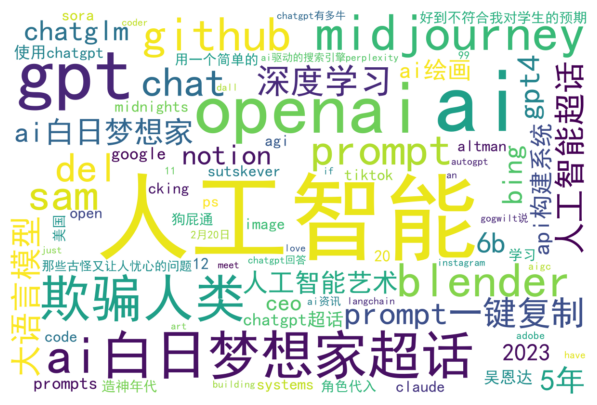

In [42]:
# 根据词袋模型分析结果绘制词云图
wordcloud = WordCloud(
    font_path='simhei.ttf',  # 指定中文字体文件路径
    background_color='white',  # 设置背景颜色
    width=1200,
    height=800,
    max_words=80,  # 设置最大显示的词数
    max_font_size=200  # 设置字体最大值
).generate_from_frequencies(word_freq)

# 显示词云图
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()